In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

1. Venda Total: R$1000.00
2. Média das vendas: R$100.00
3. Mediana das vendas: R$100.00
4. Venda Mínima: R$50.00
5. Venda Máxima: R$150.00
6. Desvio Padrão das vendas: R$29.44


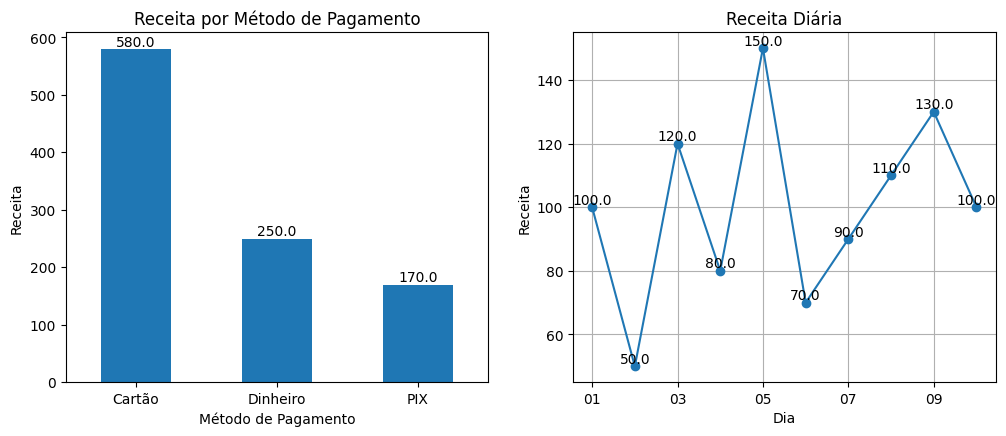

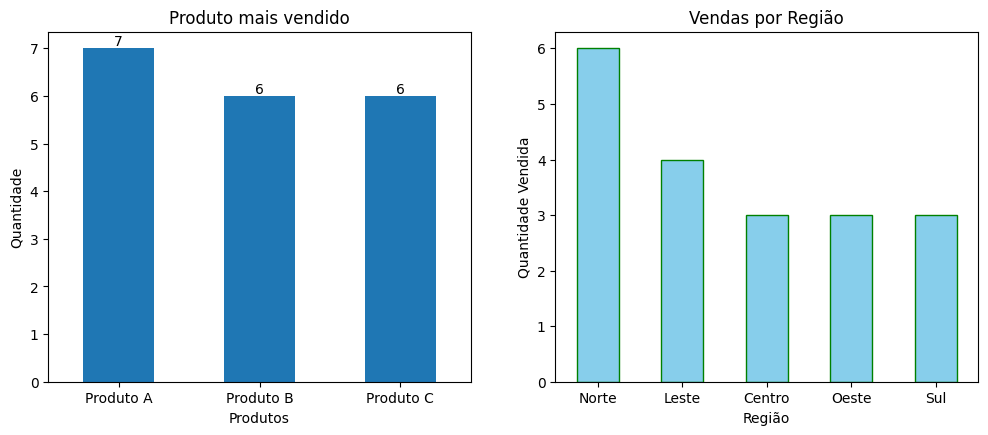

In [42]:
# criação de uma função para analise de vendas

def analise_vendas(dados_vendas): #total_vendas, media, mediana, min, max, desvio_padrao
    # criando o arquivo csv
    colunas  = ["Data da venda", "Valor da venda", "Produto vendido", "Quantidade vendida", "Método de pagamento", "Região de venda"]
    arquivo = "dados_vendas.csv"

    with open(arquivo, mode="w", newline="", encoding="utf-8") as csvfile:
        escritor = csv.DictWriter(csvfile, delimiter=",", fieldnames=colunas)
        escritor.writeheader()
        escritor.writerows(dados_vendas)

    #carregando os dados em pandas

    df = pd.read_csv(arquivo, sep=",")
    df['Data da venda'] = pd.to_datetime(df['Data da venda'])


    # estatistica descritiva:

    total_vendas = df['Valor da venda'].sum()
    media_vendas = df["Valor da venda"].mean()
    mediana_vendas = df["Valor da venda"].median()
    min = df["Valor da venda"].min()
    max = df["Valor da venda"].max()
    desvio = df["Valor da venda"].std()

    print(f"1. Venda Total: R${total_vendas:.2f}\n2. Média das vendas: R${media_vendas:.2f}\n3. Mediana das vendas: R${mediana_vendas:.2f}\n4. Venda Mínima: R${min:.2f}\n5. Venda Máxima: R${max:.2f}\n6. Desvio Padrão das vendas: R${desvio:.2f}")

    # graficos
    plt.figure(figsize=(12, 10))

    #1. pagamento mais utilizado
    plt.subplot(2, 2, 1)

    receita_por_pagamento = df.groupby("Método de pagamento")['Valor da venda'].sum()

    receita_por_pagamento.plot(kind="bar", title="Receita por Método de Pagamento", label="Total")

    plt.xlabel('Método de Pagamento')
    plt.ylabel('Receita')
    plt.xticks(rotation=0)

    for i, (index,value) in enumerate(receita_por_pagamento.items()):
        plt.text(i, value, str(value), ha='center', va='bottom')

    
    #2. Receita Diária
    plt.subplot(2, 2, 2)

    receita_diaria = df.groupby(df["Data da venda"].dt.strftime('%d'))['Valor da venda'].sum()
    receita_diaria.plot(kind='line', marker='o', title='Receita Diária')
    plt.xlabel('Dia')
    plt.ylabel('Receita')
    plt.grid(True)
    for i, (index, value) in enumerate(receita_diaria.items()):
        plt.text(i, value, str(value), ha='center', va='bottom')


    #3. Produto mais vendido
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 3)

    produto = df.groupby("Produto vendido")["Quantidade vendida"].sum()

    produto.plot(kind='bar', title="Produto mais vendido")
    
    plt.xlabel("Produtos")
    plt.ylabel('Quantidade')
    plt.xticks(rotation=0)
    for i, (index, value) in enumerate(produto.items()):
        plt.text(i, value, str(value), ha='center', va='bottom')

    #4. Vendas por Região
    plt.subplot(2, 2, 4)

    regiao = df.groupby("Região de venda")['Quantidade vendida'].sum().sort_values(ascending=False)
    regiao.plot(kind='bar', edgecolor='green', color='skyblue', title='Vendas por Região')
    plt.xlabel('Região')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=0)


dados_vendas = [
    {"Data da venda": "2023-01-01", "Valor da venda": 100.00, "Produto vendido": "Produto A", "Quantidade vendida": 2, "Método de pagamento": "Cartão", "Região de venda": "Centro"},
    {"Data da venda": "2023-01-02", "Valor da venda": 50.00, "Produto vendido": "Produto B", "Quantidade vendida": 1, "Método de pagamento": "Dinheiro", "Região de venda": "Sul"},
    {"Data da venda": "2023-01-03", "Valor da venda": 120.00, "Produto vendido": "Produto C", "Quantidade vendida": 3, "Método de pagamento": "Cartão", "Região de venda": "Norte"},
    {"Data da venda": "2023-01-04", "Valor da venda": 80.00, "Produto vendido": "Produto A", "Quantidade vendida": 2, "Método de pagamento": "PIX", "Região de venda": "Leste"},
    {"Data da venda": "2023-01-05", "Valor da venda": 150.00, "Produto vendido": "Produto B", "Quantidade vendida": 2, "Método de pagamento": "Cartão", "Região de venda": "Oeste"},
    {"Data da venda": "2023-01-06", "Valor da venda": 70.00, "Produto vendido": "Produto C", "Quantidade vendida": 1, "Método de pagamento": "Dinheiro", "Região de venda": "Centro"},
    {"Data da venda": "2023-01-07", "Valor da venda": 90.00, "Produto vendido": "Produto A", "Quantidade vendida": 2, "Método de pagamento": "PIX", "Região de venda": "Sul"},
    {"Data da venda": "2023-01-08", "Valor da venda": 110.00, "Produto vendido": "Produto B", "Quantidade vendida": 3, "Método de pagamento": "Cartão", "Região de venda": "Norte"},
    {"Data da venda": "2023-01-09", "Valor da venda": 130.00, "Produto vendido": "Produto C", "Quantidade vendida": 2, "Método de pagamento": "Dinheiro", "Região de venda": "Leste"},
    {"Data da venda": "2023-01-10", "Valor da venda": 100.00, "Produto vendido": "Produto A", "Quantidade vendida": 1, "Método de pagamento": "Cartão", "Região de venda": "Oeste"}
]
analise_vendas(dados_vendas)